In [1]:
# Importing important libraries and here,matplotlib is imported to get graphs.
import numpy #This library is used for faster computation of arrays making it more easier for us
from numpy import genfromtxt
import matplotlib #This library helps us compute all the graphs for our functions and data 
import matplotlib.pyplot as plot
import pandas #We are using pandas here to work with tabular data (Traverse through the given data file of Midterm and Final Marks)

In [2]:
#PART 1
#This section of the code is to define all the functions required for this lab.
# Here, we use Numpy to work and compute the arrays and use it in the 'cost' and 'Gradient Partial Derivatives' formula
# Function 1: stdard().
def stdard(datarray, stdard_devi, mean):
    for i in range(len(datarray)):
        datarray[i] = (datarray[i] - mean) / stdard_devi
# Function 2: cost().
def cost(M, B, featdata, targdata):
    N = len(featdata)
    c = (1 / N) * numpy.sum(numpy.square(targdata - ((M * featdata) + B)))
    return c
# Function 3: gpd() (Defining 'Gradient Partial Derivative' function).
def gpd(flag, M, B, featdata, targdata):
    N = len(featdata)
    if flag == 0:
        gpd = (2 / N) * numpy.sum((-featdata * (targdata - ((M * featdata) + B))))
        return gpd
    elif flag == 1:
        gpd = (2 / N) * numpy.sum((-(targdata - ((M * featdata) + B))))
        return gpd
    else:
        return "Flag holds a value of 1 or 0 --> Gives 0 for gpd by M and Gives 1 for gpd by B"
# Function 4: updpara() (This function gives us new/updated parameters Mnew and Bnew w.r.t alpha (Here, the learning rate)).
def updpara(Mold, Bold, alphaLR, featdata, targdata):
    Mnew = Mold - (alphaLR * gpd(0,Mold,Bold,featdata,targdata))
    Bnew = Bold - (alphaLR * gpd(1,Mold,Bold,featdata,targdata))
    return Mnew,Bnew

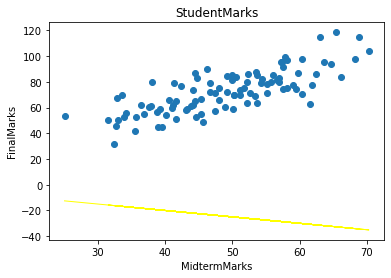

In [3]:
#WITHOUT STANDARDIZATION
#PART 2
# This section of the code is to traverse through the given data file and assign it to a data frame. 
# Once assigned,we then find the mean and standard deviation of the Midterm marks and the Final Marks.
# We also get a plot from all the datapoints of Student Marks.
# Here, we use pandas library to traverse through the given file
# Assign our given datapoints to 'datafile'.
datafile = pandas.read_csv(r"https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
# Defining 2 variables for the Midterm marks and Finals marks to be seperated from the datafile 
midmark = datafile["Midterm mark"]
finalmark = datafile["Final mark"]
# Calculating the mean and standard deviation of each datapoint. 
# axis 0 here stores the mean and std.deviation in row 0 (1D array) of the array
midmean = midmark.mean(axis=0)
midstd = midmark.std(axis=0)
finalmean = finalmark.mean(axis=0)
finalstd = finalmark.std(axis=0)
# Initialize alphaLR, M, and B values to what is given on the lab manual.
alphaLR = 0.0001; M = -0.5; B = 0
#PART 3 and 4
# Initial linear regression.(equation reference: y=mx+b)
targval = (M * midmark) + B
# Plotting datapoints and initial linear regression line:
plot.scatter(midmark, finalmark) #plots all the datapoints in x-y plane 
plot.plot(midmark, targval, color='yellow', linewidth=1) #plots the slop of linear regression (The yellow line)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

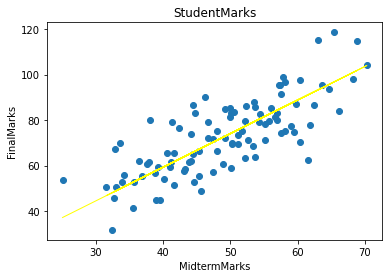

In [4]:
#PART 5
#Update b and m 100 times, and create another figure showing the regression line and datapoints in the same figure

slope_intercept = numpy.array([M, B]) #Goes through the array and gives us all the M and B values 
for i in range(1, 100): #Iterates 100 times and with each iteration, we get a Mnew and Bnew 
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.0001,featdata=midmark, targdata=finalmark)
    newROW = numpy.array([Mnew, Bnew])
    slope_intercept = numpy.vstack((slope_intercept, newROW))#After every iteration, the input array sequence is stacked on to make a single array
    M = Mnew
    B = Bnew
# Once the 100 iterations are done, the Regeression line generated contains the new slope and intercept
targval = (M * midmark) + B
# Plotting datapoints and linear regression model:
plot.scatter(midmark, finalmark)
plot.plot(midmark, targval, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

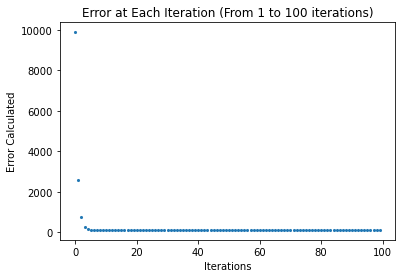

In [5]:
#PART 6
# Create a new graph showing Error at each iteration (from initial point to iteration 100).x-axis is iteration number and y-axis is Error.
itrerror = numpy.array([])#This creates an array to append the error after each iteration
for M, B in slope_intercept:
    error = cost(M=M, B=B, featdata=midmark, targdata=finalmark)#Defined function to give us the error
    itrerror = numpy.append(itrerror, error)#Appends the error after each iteration and then keeps appending until it reaches the 100th iteration
plot.scatter(range(0, 100), itrerror, linewidths=0.1, marker='.')
plot.title('Error at Each Iteration (From 1 to 100 iterations)')
plot.xlabel('Iterations')
plot.ylabel('Error Calculated')
plot.show()

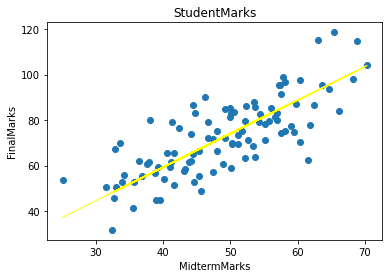

In [6]:
#PART 7
# Update m and b for 2000 iterations create another figure showing the regression line and data-points.
slope_intercept = numpy.array([M,B]) #Goes through the array and gives us all the M and B values.
for i in range(1, 2000): #For loop to go through each iteration.
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=alphaLR, featdata=midmark, targdata=finalmark)#Calling the function and assigning them values
    newROW = numpy.array([Mnew, Bnew])#Makes a new row of marks that are read after each iteration 
    slope_intercept = numpy.vstack((slope_intercept, newROW))#Storing the newly read data from newROW into the array 'slope_intercept'
    M = Mnew #Overwriting slope and y-intercept value
    B = Bnew
#Defining the linear regression model and plotting the marks from iteration 1-2000. 
targval = (M * midmark) + B
plot.scatter(midmark, finalmark)
plot.plot(midmark, targval, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

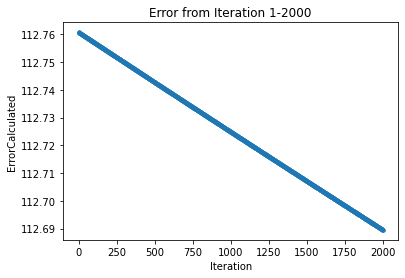

In [7]:
#PART 8
# Create a new graph showing Error at each iteration (from initial point to iteration 100).X-axis is iteration number, Y-axis is Error.
itrerror = numpy.array([])
for M, B in slope_intercept:
    error = cost(M=M, B=B, featdata=midmark, targdata=finalmark)
    itrerror = numpy.append(itrerror, error)
#Plotting the error at each iteration
plot.scatter(range(0, 2000), itrerror, linewidths=1, marker='.')
plot.title('Error from Iteration 1-2000')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()

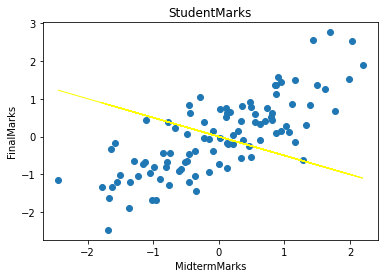

In [8]:
# WITH STANDARDIZATION #PS: ALL THE STEPS AND COMMENTS ARE THE SAME AS ITERATIONS WITHOUT STANDARDIZATION, BUT HERE WE USE THE FUNCTION stdard(). 

datafile = pandas.read_csv(r"https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
midmark1 = datafile["Midterm mark"]
finalmark1 = datafile["Final mark"]
#Mean and Standard deviation of Midterm and Final marks before calling the standardization function
midmean = midmark1.mean(axis=0)
midstd = midmark1.std(axis=0)
finalmean = finalmark1.mean(axis=0)
finalstd = finalmark1.std(axis=0)
# Standardizing Midterm Marks and Final Marks by calling stdard() and assigning parameters
stdard(datarray=midmark1, stdard_devi=midstd, mean=midmean)
stdard(datarray=finalmark1, stdard_devi=finalstd, mean=finalmean)
# Mean and Standard deviation of Midterm and Final marks after calling the standardization function
midmean = midmark1.mean(axis=0)
midstd = midmark1.std(axis=0)
finalmean = finalmark1.mean(axis=0)
finalstd = finalmark1.std(axis=0)
# Assigning initial values for Learning Rate, slope, and y-intercept values 
alphaLR = 0.0001; M = -0.5; B = 0
targval1 = (M * midmark1) + B #This builds the initial linear regression using the reference equation: y=Mx+B
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()


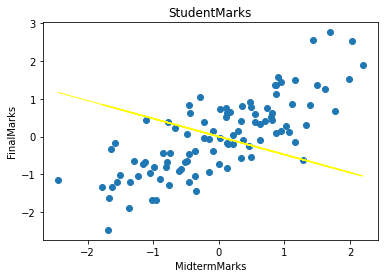

In [9]:
# Update b and m 100 times and create another figure showing the regression line and data-points in the same figure.

slope_intercept1 = numpy.array([M,B])    
for i in range(1, 100):
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.0001, featdata=midmark1, targdata=finalmark1)
    newROW1 = numpy.array([Mnew, Bnew])
    slope_intercept1 = numpy.vstack((slope_intercept1, newROW1))
    M = Mnew
    B = Bnew
targval1 = (M * midmark1) + B #(y=Mx+B)
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

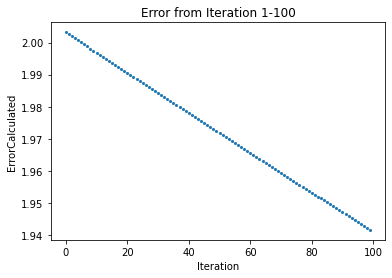

In [10]:
# Create a new graph showing Error at each iteration (from initial point to iteration 100).X-axis is iteration number, Y-axis is Error.

itrerror1 = numpy.array([])
for M, B in slope_intercept1:
    error = cost(M=M, B=B, featdata=midmark1, targdata=finalmark1)
    itrerror1 = numpy.append(itrerror1, error)
plot.scatter(range(0, 100), itrerror1, linewidths=0.1, marker='.')
plot.title('Error from Iteration 1-100')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()

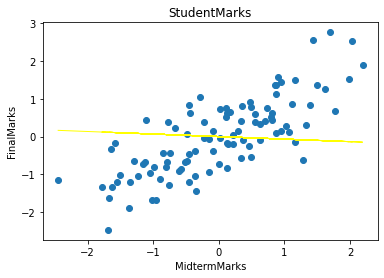

In [11]:
# Update m and b for 2000 iterations create another figure showing the regression line and data-points.
slope_intercept1 = numpy.array([M,B])    
for i in range(1, 2000):
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=alphaLR,featdata=midmark1, targdata=finalmark1)
    newROW1 = numpy.array([Mnew, Bnew])
    slope_intercept1 = numpy.vstack((slope_intercept1, newROW1))
    M = Mnew
    B = Bnew
targval1 = (M * midmark1) + B
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

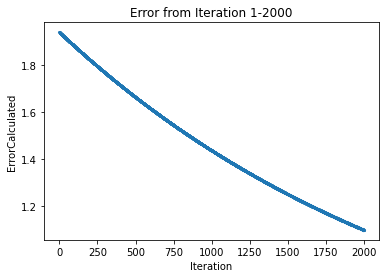

In [12]:
# Create a new graph showing Error at each iteration (from initial point to iteration 100).X-axis is iteration number, Y-axis is Error.
itrerror1 = numpy.array([])
for M, B in slope_intercept1:
    error = cost(M=M, B=B, featdata=midmark1, targdata=finalmark1)
    itrerror1 = numpy.append(itrerror1, error)
plot.scatter(range(0, 2000), itrerror1, linewidths=0.1, marker='.')
plot.title('Error from Iteration 1-2000')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()

In [13]:
................................................................................................................................


SyntaxError: invalid syntax (<ipython-input-13-f8a670f1d463>, line 1)

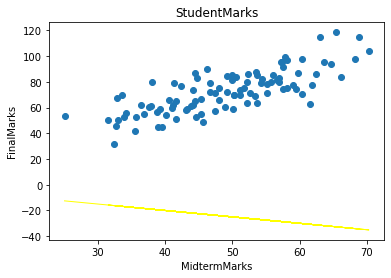

In [14]:
datafile = pandas.read_csv(r"https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
# Defining 2 variables for the Midterm marks and Finals marks to be seperated from the datafile 
midmark = datafile["Midterm mark"]
finalmark = datafile["Final mark"]
# Calculating the mean and standard deviation of each datapoint. 
# axis 0 here stores the mean and std.deviation in row 0 (1D array) of the array
midmean = midmark.mean(axis=0)
midstd = midmark.std(axis=0)
finalmean = finalmark.mean(axis=0)
finalstd = finalmark.std(axis=0)
# Initialize alphaLR, M, and B values to what is given on the lab manual.
alphaLR = 0.1
M = -0.5
B = 0
#PART 3 and 4
# initial linear regression.(equation reference: y=mx+b)
targval = (M * midmark) + B
# Plotting datapoints and initial linear regression line:
plot.scatter(midmark, finalmark) #plots all the datapoints in x-y plane 
plot.plot(midmark, targval, color='yellow', linewidth=1) #plots the slop of linear regression (The yellow line)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

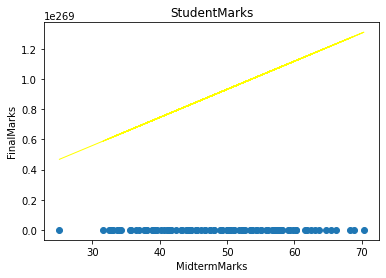

In [15]:
#Update b and m 100 times, and create another figure showing the regression line and datapoints in the same figure

slope_intercept = numpy.array([M, B]) #Goes through the array and gives us all the M and B values 
for i in range(1, 100): #Iterates 100 times and with each iteration, we get a Mnew and Bnew 
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.1,featdata=midmark, targdata=finalmark)
    newROW = numpy.array([Mnew, Bnew])
    slope_intercept = numpy.vstack((slope_intercept, newROW))#After every iteration, the input array sequence is stacked on to make a single array
    M = Mnew
    B = Bnew
# Once the 100 iterations are done, the Regeression line generated contains the new slope and intercept
targval = (M * midmark) + B
# Plotting datapoints and linear regression model:
plot.scatter(midmark, finalmark)
plot.plot(midmark, targval, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


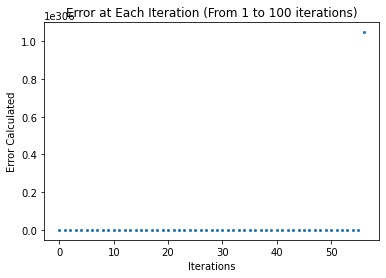

In [16]:
# Create a new graph showing Error at each iteration (from initial point to iteration 100).x-axis is iteration number and y-axis is Error.
itrerror = numpy.array([])#This creates an array to append the error after each iteration
for M, B in slope_intercept:
    error = cost(M=M, B=B, featdata=midmark, targdata=finalmark)#Defined function to give us the error
    itrerror = numpy.append(itrerror, error)#Appends the error after each iteration and then keeps appending until it reaches the 100th iteration
plot.scatter(range(0, 100), itrerror, linewidths=0.1, marker='.')
plot.title('Error at Each Iteration (From 1 to 100 iterations)')
plot.xlabel('Iterations')
plot.ylabel('Error Calculated')
plot.show()

<ipython-input-2-4172d10b1eca>:32: RuntimeWarning: invalid value encountered in double_scalars
  Mnew = Mold - (alphaLR * gpd(0, Mold, Bold, featdata, targdata))
<ipython-input-2-4172d10b1eca>:33: RuntimeWarning: invalid value encountered in double_scalars
  Bnew = Bold - (alphaLR * gpd(1, Mold, Bold, featdata, targdata))


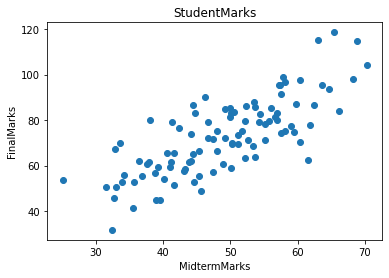

In [17]:
# Update m and b for 2000 iterations create another figure showing the regression line and data-points.
slope_intercept = numpy.array([M,B]) #Goes through the array and gives us all the M and B values.
for i in range(1, 2000): #For loop to go through each iteration.
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.1, featdata=midmark, targdata=finalmark)#Calling the function and assigning them values
    newROW = numpy.array([Mnew, Bnew])#Makes a new row of marks that are read after each iteration 
    slope_intercept = numpy.vstack((slope_intercept, newROW))#Storing the newly read data from newROW into the array 'slope_intercept'
    M = Mnew #Overwriting slope and y-intercept value
    B = Bnew
#Defining the linear regression model and plotting the marks from iteration 1-2000. 
targval = (M * midmark) + B
plot.scatter(midmark, finalmark)
plot.plot(midmark, targval, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


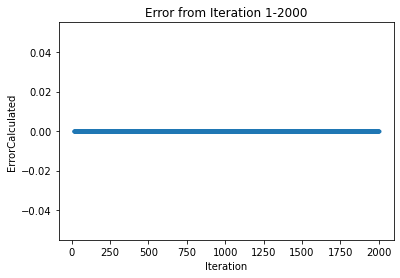

In [18]:
# Create a new graph showing Error at each iteration (from initial point to iteration 100).X-axis is iteration number, Y-axis is Error.
itrerror = numpy.array([])
for M, B in slope_intercept:
    error = cost(M=M, B=B, featdata=midmark, targdata=finalmark)
    itrerror = numpy.append(itrerror, error)
#Plotting the error at each iteration
plot.scatter(range(0, 2000), itrerror, linewidths=1, marker='.')
plot.title('Error from Iteration 1-2000')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()

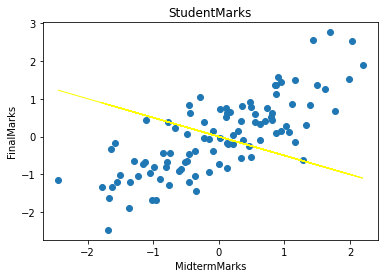

In [19]:
datafile = pandas.read_csv(r"https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
midmark1 = datafile["Midterm mark"]
finalmark1 = datafile["Final mark"]
#Mean and Standard deviation of Midterm and Final marks before calling the standardization function
midmean = midmark1.mean(axis=0)
midstd = midmark1.std(axis=0)
finalmean = finalmark1.mean(axis=0)
finalstd = finalmark1.std(axis=0)
# Standardizing Midterm Marks and Final Marks by calling stdard() and assigning parameters
stdard(datarray=midmark1, stdard_devi=midstd, mean=midmean)
stdard(datarray=finalmark1, stdard_devi=finalstd, mean=finalmean)
# Mean and Standard deviation of Midterm and Final marks after calling the standardization function
midmean = midmark1.mean(axis=0)
midstd = midmark1.std(axis=0)
finalmean = finalmark1.mean(axis=0)
finalstd = finalmark1.std(axis=0)
# Assigning initial values for Learning Rate, slope, and y-intercept values 
alphaLR = 0.1; M = -0.5; B = 0
targval1 = (M * midmark1) + B #This builds the initial linear regression using the reference equation: y=Mx+B
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

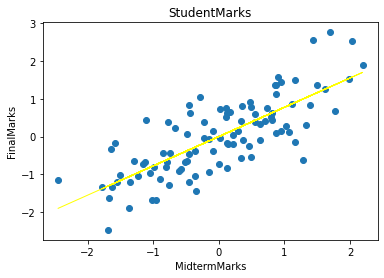

In [20]:
slope_intercept1 = numpy.array([M,B])    
for i in range(1, 100):
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.1, featdata=midmark1, targdata=finalmark1)
    newROW1 = numpy.array([Mnew, Bnew])
    slope_intercept1 = numpy.vstack((slope_intercept1, newROW1))
    M = Mnew
    B = Bnew
targval1 = (M * midmark1) + B #(y=Mx+B)
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()


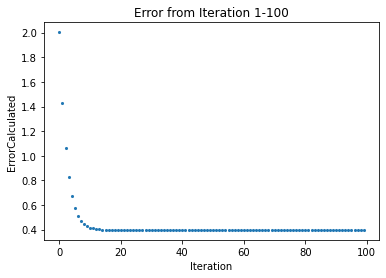

In [21]:
itrerror1 = numpy.array([])
for M, B in slope_intercept1:
    error = cost(M=M, B=B, featdata=midmark1, targdata=finalmark1)
    itrerror1 = numpy.append(itrerror1, error)
plot.scatter(range(0, 100), itrerror1, linewidths=0.1, marker='.')
plot.title('Error from Iteration 1-100')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()

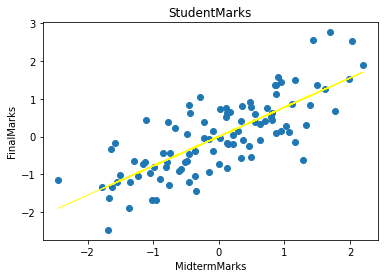

In [22]:
# Update m and b for 2000 iterations create another figure showing the regression line and data-points.
slope_intercept1 = numpy.array([M,B])    
for i in range(1, 2000):
    Mnew, Bnew = updpara(Mold=M, Bold=B, alphaLR=0.1,featdata=midmark1, targdata=finalmark1)
    newROW1 = numpy.array([Mnew, Bnew])
    slope_intercept1 = numpy.vstack((slope_intercept1, newROW1))
    M = Mnew
    B = Bnew
targval1 = (M * midmark1) + B
plot.scatter(midmark1, finalmark1)
plot.plot(midmark1, targval1, color='yellow', linewidth=1)
plot.title('StudentMarks')
plot.xlabel('MidtermMarks')
plot.ylabel('FinalMarks')
plot.show()

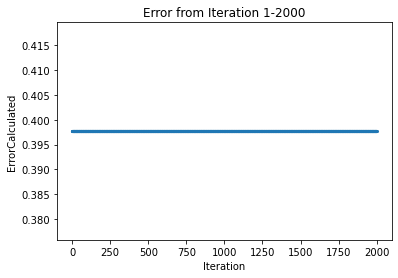

In [23]:
# Create a new graph showing Error at each iteration (from initial point to iteration 100).X-axis is iteration number, Y-axis is Error.
itrerror1 = numpy.array([])
for M, B in slope_intercept1:
    error = cost(M=M, B=B, featdata=midmark1, targdata=finalmark1)
    itrerror1 = numpy.append(itrerror1, error)
plot.scatter(range(0, 2000), itrerror1, linewidths=0.1, marker='.')
plot.title('Error from Iteration 1-2000')
plot.xlabel('Iteration')
plot.ylabel('ErrorCalculated')
plot.show()